In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff

#Text Preprocessing libraries
import nltk
nltk.download('stopwords')
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
import re 

#import contractions
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn import preprocessing

from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
import pandas as pd
import string


nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhair\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhair\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_red = "#eb345b"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

In [6]:
api = KaggleApi()
api.authenticate()

# Download Dataset
api.dataset_download_files('rmisra/news-headlines-dataset-for-sarcasm-detection')

# Unzip Dataset
zf = ZipFile('news-headlines-dataset-for-sarcasm-detection.zip')
zf.extractall('data\\') 
zf.close()

#Read Dataset and Print
#df = pd.read_json("data/Sarcasm_Headlines_Dataset.json", lines=True)
#df.to_csv('sarcasm.csv')

#print(df.head(5))

In [7]:
df = pd.read_json("data/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [9]:
df['source_of_text'] = df['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  source_of_text  
0  https://www.theonion.com/thirtysomething-scien...        theonion  
1  https://www.huffingtonpost.com/entry/donna-edw...  huffingtonpost  
2  https://www.huffingtonpost.com/entry/eat-your-...  huffingtonpost  
3  https://local.theonion.com/inclement-weather-p...        theonion  
4  https://www.theonion.com/mother-comes-pretty-c...        theonion

In [10]:
#Dropping Columns that are not in use
df = df.drop(['article_link'],axis = 1)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

   source_of_text  
0        theonion  
1  huffingtonpost  
2  huffingtonpost  
3        theonion  
4        theonion

Text(0.5, 0, 'Source')

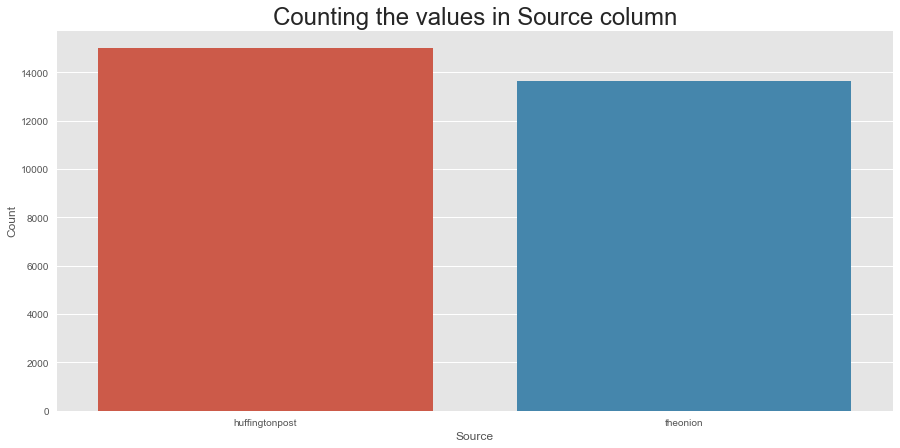

In [11]:
#Plotting style
plt.style.use('ggplot')

#Plotting Bar graph on source of data
target_counts=df['source_of_text'].value_counts()
plt.figure(figsize = (15,7))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Counting the values in Source column",fontsize = 24)
plt.ylabel('Count')
plt.xlabel('Source')

In [12]:
#Plotting pie chart using plotty on data
fig = px.pie(df,names='is_sarcastic',labels=['Sarcastic','Acclaim'],title='Sarcasam Vs Acclaim',template='plotly_dark')
fig.show()

In [13]:
#Preprocessing Data
df['headline']=df['headline'].str.lower()
# Remove the Hashtags from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove the links from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r"http\S+", "", x))
# Remove the Special characters from the text 
df['headline']=df['headline'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Substitute the multiple spaces with single spaces
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Remove all the single characters in the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
df['headline']=df['headline'].apply(lambda x:re.sub('@[^\s]+','',x))

#Removing Stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['headline_clean'] = df['headline'].apply(remove_stopwords)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

   source_of_text                                     headline_clean  
0        theonion  thirtysomething scientists unveil doomsday clo...  
1  huffingtonpost  dem rep totally nails congress falling short g...  
2  huffingtonpost        eat veggies 9 deliciously different recipes  
3        theonion       inclement weather prevents liar getting work  
4        theonion  mother comes pretty close using word streaming...

In [14]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['headline_clean'].apply(lambda x: tokenization(x.lower()))
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

   source_of_text                                     headline_clean  \
0        theonion  thirtysomething scientists unveil doomsday clo...   
1  huffingtonpost  dem rep totally nails congress falling short g...   
2  huffingtonpost        eat veggies 9 deliciously different recipes   
3        theonion       inclement weather prevents liar getting work   
4        theonion  mother comes pretty close using word streaming...   

                                           tokenized  
0  [thirtysomething, scientists, unveil, doomsday...  
1  [dem, rep, totally, nails, congress, falling, ...  
2  [eat, veggies, 9, deliciously, different, reci...  
3  [inclement, weather, prevents, liar, getting, ...  
4  [mother, comes, pretty, close, using, word, st...

In [15]:
#Print 10 Sarcastic headlines
sarcastic = df[df['is_sarcastic']==0]['headline_clean']
sarcastic[:10]

1     dem rep totally nails congress falling short g...
2           eat veggies 9 deliciously different recipes
5                                     white inheritance
6                         5 ways file taxes less stress
9                            lots parents know scenario
10         lesbian consideredfather indiana amazing one
11          amanda peet told daughter sex isspecial hug
12              know regarding current treatments ebola
13    chris christie suggests hillary clinton blame ...
15    uber ceo travis kalanick stepping trump econom...
Name: headline_clean, dtype: object

In [16]:
#Print 10 Non-Sarcastic headlines
not_sarcastic = df[df['is_sarcastic']==1]['headline_clean']
not_sarcastic[:10]

0     thirtysomething scientists unveil doomsday clo...
3          inclement weather prevents liar getting work
4     mother comes pretty close using word streaming...
7     richard bransonglobal warming donation nearly ...
8     shadow government getting large meet marriott ...
14           ford develops new suv runs purely gasoline
16    area boy enters jumping touching tops doorways...
17                            area man traveling gurney
21    guard video game strict orders repeatedly pace...
25     secret service agent secret david alan grier fan
Name: headline_clean, dtype: object

In [17]:
#stemmer = nltk.SnowballStemmer("english")

#def stemm_text(text):
#    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
#    return text

#df['headline_clean'] = df['headline_clean'].apply(stemm_text)
#df.head()

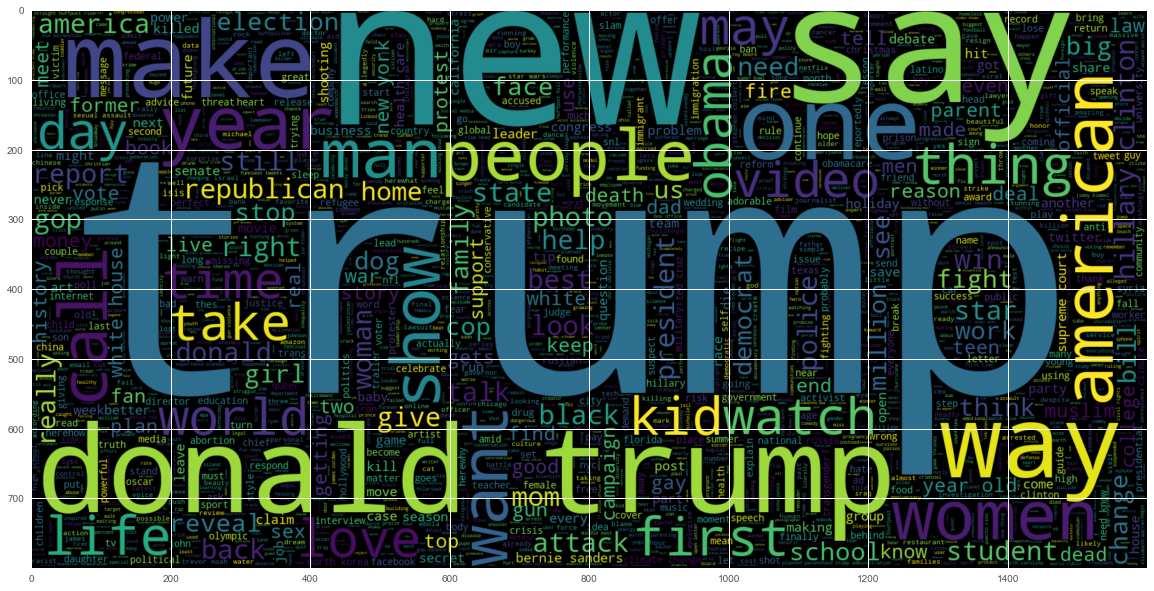

In [18]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

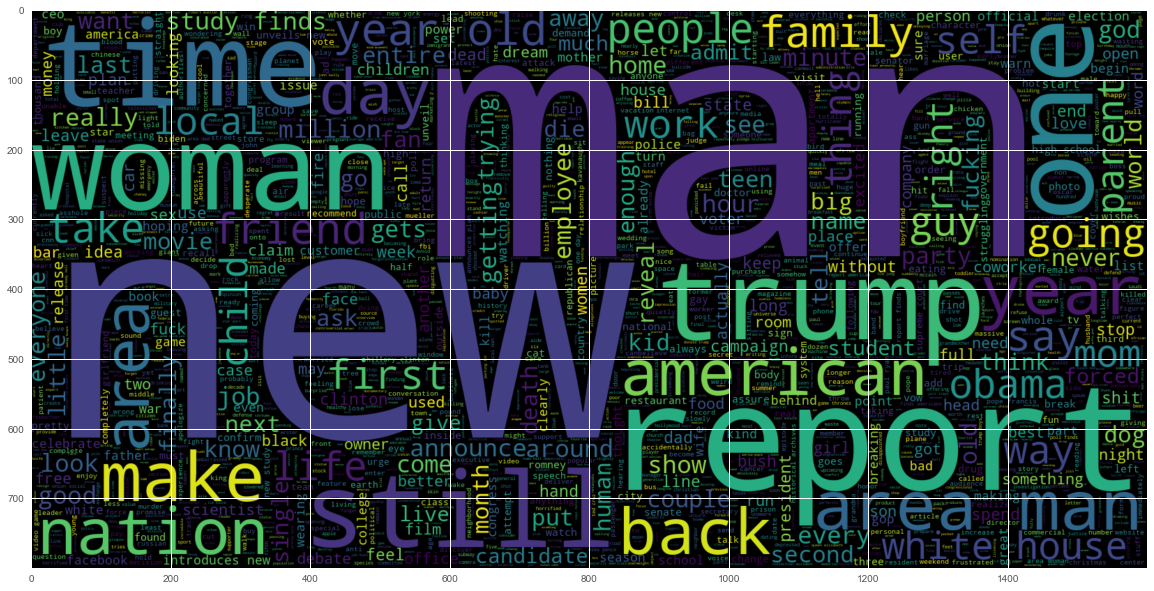

In [19]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

In [20]:
#THE TOP 100 MOST FREQUENTLY OCCURING WORDS IN HEADLINE DATA
all_words=[]
for i in range(len(df['tokenized'])):
    a=df['tokenized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:100].rename_axis('Common Words').reset_index(name='count')

fig = px.treemap(common_words, path=['Common Words'], values='count',template= "plotly_dark",title='100 Most Common Words In Headline')
fig.show()

In [21]:
#Spliting it into training and testing 
X = df['headline_clean']
y = df['is_sarcastic']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

22895 22895
5724 5724


In [22]:
#PreProcessing
df['headline']=df['headline'].str.lower()
# Remove the Hashtags from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove the links from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r"http\S+", "", x))
# Remove the Special characters from the text 
df['headline']=df['headline'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Substitute the multiple spaces with single spaces
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Remove all the single characters in the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
df['headline']=df['headline'].apply(lambda x:re.sub('@[^\s]+','',x))

In [23]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['headline_clean'] = df['headline'].apply(remove_stopwords)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

   source_of_text                                     headline_clean  \
0        theonion  thirtysomething scientists unveil doomsday clo...   
1  huffingtonpost  dem rep totally nails congress falling short g...   
2  huffingtonpost        eat veggies 9 deliciously different recipes   
3        theonion       inclement weather prevents liar getting work   
4        theonion  mother comes pretty close using word streaming...   

                                           tokenized  
0  [thirtysomething, scientists, unveil, doomsday...  
1  [dem, rep, totally, nails, congress, falling, ...  
2  [eat, veggies, 9, deliciously, different, reci...  
3  [inclement, weather, prevents, liar, getting, ...  
4  [mother, comes, pretty, close, using, word, st...

In [24]:
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['headline_clean'].apply(lambda x: tokenization(x.lower()))
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

   source_of_text                                     headline_clean  \
0        theonion  thirtysomething scientists unveil doomsday clo...   
1  huffingtonpost  dem rep totally nails congress falling short g...   
2  huffingtonpost        eat veggies 9 deliciously different recipes   
3        theonion       inclement weather prevents liar getting work   
4        theonion  mother comes pretty close using word streaming...   

                                           tokenized  
0  [thirtysomething, scientists, unveil, doomsday...  
1  [dem, rep, totally, nails, congress, falling, ...  
2  [eat, veggies, 9, deliciously, different, reci...  
3  [inclement, weather, prevents, liar, getting, ...  
4  [mother, comes, pretty, close, using, word, st...

In [25]:
#Print Sarcastic Headlines
sarcastic = df[df['is_sarcastic']==0]['headline_clean']
sarcastic[:10]

1     dem rep totally nails congress falling short g...
2           eat veggies 9 deliciously different recipes
5                                     white inheritance
6                         5 ways file taxes less stress
9                            lots parents know scenario
10         lesbian consideredfather indiana amazing one
11          amanda peet told daughter sex isspecial hug
12              know regarding current treatments ebola
13    chris christie suggests hillary clinton blame ...
15    uber ceo travis kalanick stepping trump econom...
Name: headline_clean, dtype: object

In [26]:
#Print Non-Sarcastic Headlines
not_sarcastic = df[df['is_sarcastic']==1]['headline_clean']
not_sarcastic[:10]

0     thirtysomething scientists unveil doomsday clo...
3          inclement weather prevents liar getting work
4     mother comes pretty close using word streaming...
7     richard bransonglobal warming donation nearly ...
8     shadow government getting large meet marriott ...
14           ford develops new suv runs purely gasoline
16    area boy enters jumping touching tops doorways...
17                            area man traveling gurney
21    guard video game strict orders repeatedly pace...
25     secret service agent secret david alan grier fan
Name: headline_clean, dtype: object

In [27]:
#Spliting it into training and testing 
X = df['headline_clean']
y = df['is_sarcastic']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

24326 24326
4293 4293


In [28]:
cv = CountVectorizer(ngram_range=(1,3))
X_train = cv.fit_transform(x_train)
X_test = cv.transform(x_test)

In [29]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

SVM:train set
SVM:Confusion Matrix:  [[12706    33]
 [  438 11149]]
SVM:Accuracy : 98.06380004932993
SVM:Test set
SVM:Confusion Matrix:  [[2175   71]
 [1180  867]]
SVM:Accuracy :  70.85953878406708


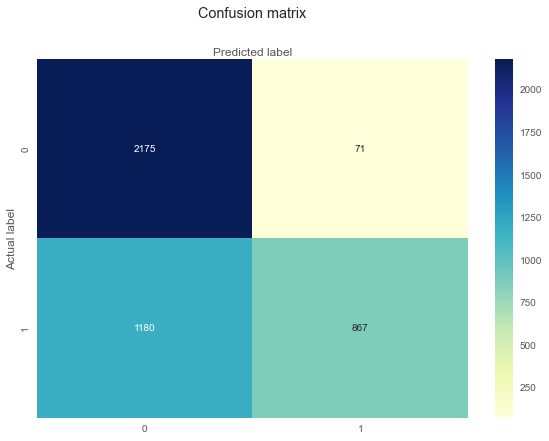

AUC: 0.87


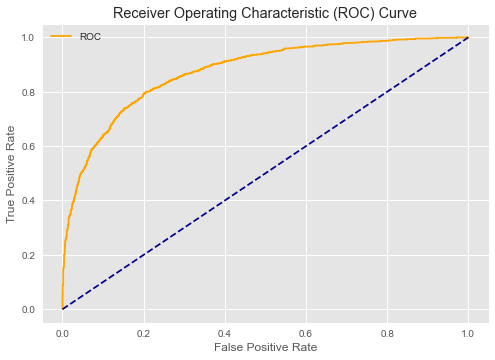

              precision    recall  f1-score   support

         Yes       0.65      0.97      0.78      2246
          No       0.92      0.42      0.58      2047

    accuracy                           0.71      4293
   macro avg       0.79      0.70      0.68      4293
weighted avg       0.78      0.71      0.68      4293



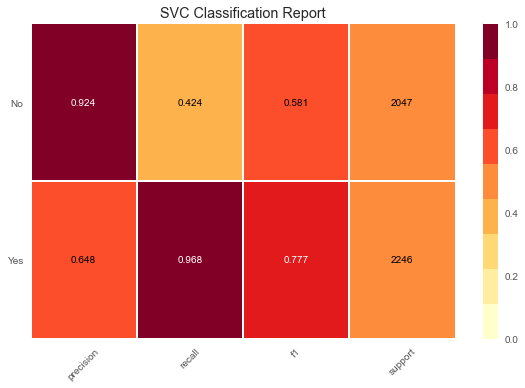

In [30]:
#SVM
def Support_Vector(X_train,y_train,X_test,y_test):
  svm = SVC(probability=True)
  svm.fit(X_train,y_train)
  print("SVM:train set")
  y_pred = svm.predict(X_train)
  pred=svm.predict_proba(X_test)   
  print("SVM:Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("SVM:Accuracy :", accuracy_score(y_train,y_pred)*100)
  print("SVM:Test set")
  y_pred = svm.predict(X_test)
  print("SVM:Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("SVM:Accuracy : ", accuracy_score(y_test,y_pred)*100)
  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=[0,1] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  #ROC_AUC curve
  probs = svm.predict_proba(X_test) 
  probs = probs[:, 1]  
  auc = roc_auc_score(y_test, probs)  
  print('AUC: %.2f' % auc)
  le = preprocessing.LabelEncoder()
  y_test1=le.fit_transform(y_test)
  fpr, tpr, thresholds = roc_curve(y_test1, probs)
  plot_roc_curve(fpr, tpr)
  #Classification Report
  target_names = ['Yes', 'No']
  prediction=svm.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ["Yes", "No"]
  visualizer = ClassificationReport(svm, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()

Support_Vector(X_train,y_train,X_test,y_test)

DecisionTreeClassifier :train set
DecisionTreeClassifier :Confusion Matrix:  [[12739     0]
 [    0 11587]]
DecisionTreeClassifier :Accuracy :  100.0
DecisionTreeClassifierr :Test set
DecisionTreeClassifier :Confusion Matrix:  [[1672  574]
 [ 658 1389]]
DecisionTreeClassifier :Accuracy :  71.3021197297927


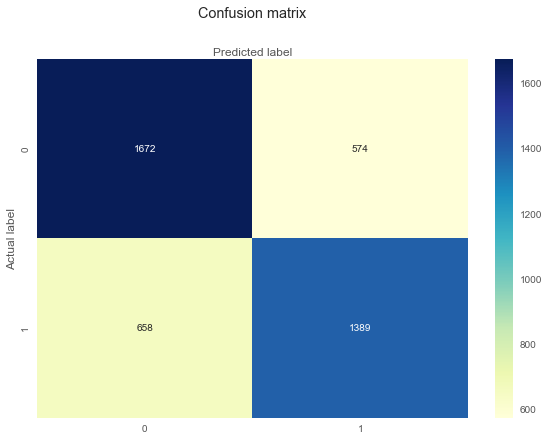

AUC: 0.71


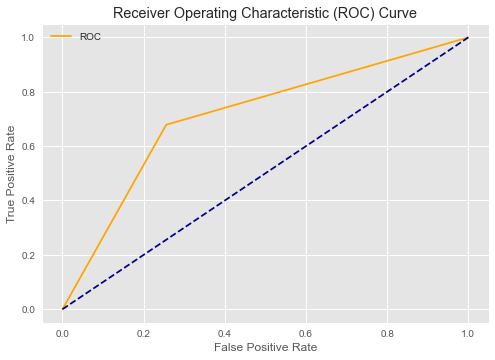

              precision    recall  f1-score   support

         Yes       0.72      0.74      0.73      2246
          No       0.71      0.68      0.69      2047

    accuracy                           0.71      4293
   macro avg       0.71      0.71      0.71      4293
weighted avg       0.71      0.71      0.71      4293



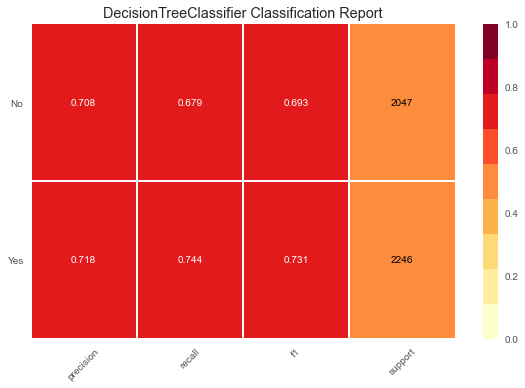

In [31]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier
def DT(X_train,y_train,X_test,y_test):
  sc = DecisionTreeClassifier()  
  sc.fit(X_train,y_train)
  print("DecisionTreeClassifier :train set")
  y_pred = sc.predict(X_train)
  #pred=vc.predict_proba(X_test)   
  print("DecisionTreeClassifier :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("DecisionTreeClassifier :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("DecisionTreeClassifierr :Test set")
  y_pred = sc.predict(X_test)
  print("DecisionTreeClassifier :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("DecisionTreeClassifier :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=[0,1] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  #ROC_AUC curve
  probs = sc.predict_proba(X_test) 
  probs = probs[:, 1]  
  auc = roc_auc_score(y_test, probs)  
  print('AUC: %.2f' % auc)
  le = preprocessing.LabelEncoder()
  y_test1=le.fit_transform(y_test)
  fpr, tpr, thresholds = roc_curve(y_test1, probs)
  plot_roc_curve(fpr, tpr)
  #Classification Report
  target_names = ['Yes', 'No']
  prediction=sc.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ["Yes", "No"]
  visualizer = ClassificationReport(sc, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()

DT(X_train,y_train,X_test,y_test)

AdaBoostClassifier:Confusion Matrix:  [[11546  1193]
 [ 6948  4639]]
AdaBoostClassifier:Accuracy :  66.5337498972293
AdaBoostClassifier:Test set
AdaBoostClassifier:Confusion Matrix:  [[2031  215]
 [1263  784]]
AdaBoostClassifier:Accuracy :  65.57186116934545


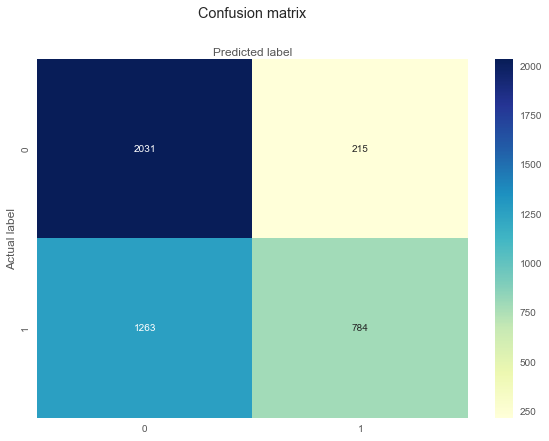

AUC: 0.69


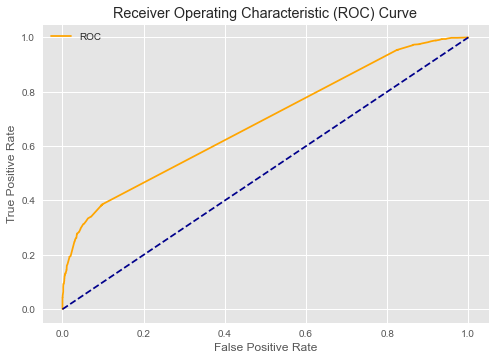

              precision    recall  f1-score   support

         Yes       0.62      0.90      0.73      2246
          No       0.78      0.38      0.51      2047

    accuracy                           0.66      4293
   macro avg       0.70      0.64      0.62      4293
weighted avg       0.70      0.66      0.63      4293



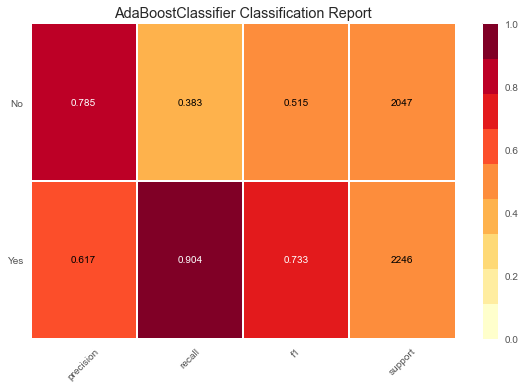

In [32]:
#AdaBoostClassifier
def ADA(X_train,y_train,X_test,y_test):
  ada=AdaBoostClassifier()
  ada.fit(X_train,y_train)
  y_pred = ada.predict(X_train)
  pred=ada.predict_proba(X_test)   
  print("AdaBoostClassifier:Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("AdaBoostClassifier:Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("AdaBoostClassifier:Test set")
  y_pred = ada.predict(X_test)
  print("AdaBoostClassifier:Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("AdaBoostClassifier:Accuracy : ", accuracy_score(y_test,y_pred)*100)
  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=[0,1] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  #ROC_AUC curve
  probs = ada.predict_proba(X_test) 
  probs = probs[:, 1]  
  auc = roc_auc_score(y_test, probs)  
  print('AUC: %.2f' % auc)
  le = preprocessing.LabelEncoder()
  y_test1=le.fit_transform(y_test)
  fpr, tpr, thresholds = roc_curve(y_test1, probs)
  plot_roc_curve(fpr, tpr)
  #Classification Report
  target_names = ['Yes', 'No']
  prediction=ada.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ["Yes", "No"]
  visualizer = ClassificationReport(ada, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()

ADA(X_train,y_train,X_test,y_test)

LogisticRegression:train set
LogisticRegression:Confusion Matrix:  [[12735     4]
 [   18 11569]]
LogisticRegression:Accuracy :  99.90956178574365
LogisticRegression:Test set
LogisticRegression:Confusion Matrix:  [[1956  290]
 [ 555 1492]]
LogisticRegression:Accuracy :  80.31679478220359


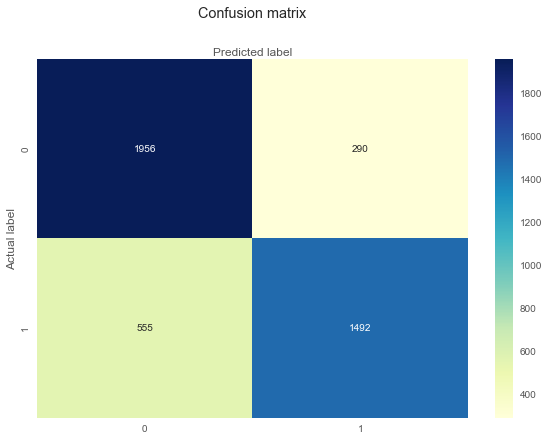

AUC: 0.89


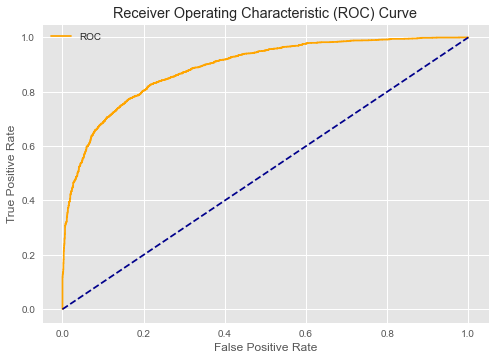

              precision    recall  f1-score   support

         Yes       0.78      0.87      0.82      2246
          No       0.84      0.73      0.78      2047

    accuracy                           0.80      4293
   macro avg       0.81      0.80      0.80      4293
weighted avg       0.81      0.80      0.80      4293



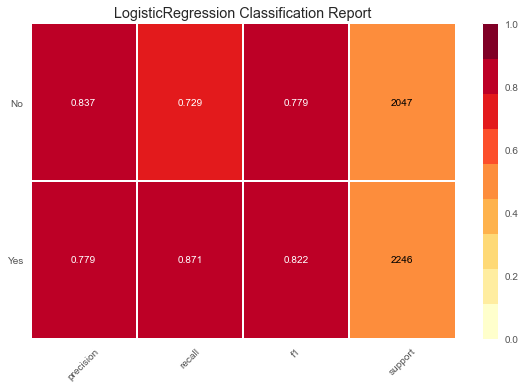

In [33]:
#Logistic Regression
def LogReg(X_train,y_train,X_test,y_test):
  lr = LogisticRegression()
  lr.fit(X_train,y_train)
  print("LogisticRegression:train set")
  y_pred = lr.predict(X_train)
  pred=lr.predict_proba(X_test)   
  print("LogisticRegression:Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("LogisticRegression:Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("LogisticRegression:Test set")
  y_pred = lr.predict(X_test)
  print("LogisticRegression:Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("LogisticRegression:Accuracy : ", accuracy_score(y_test,y_pred)*100)
  #confusion Matrix
  matrix =confusion_matrix(y_test, y_pred)
  class_names=[0,1] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  #ROC_AUC curve
  probs = lr.predict_proba(X_test) 
  probs = probs[:, 1]  
  auc = roc_auc_score(y_test, probs)  
  print('AUC: %.2f' % auc)
  le = preprocessing.LabelEncoder()
  y_test1=le.fit_transform(y_test)
  fpr, tpr, thresholds = roc_curve(y_test1, probs)
  plot_roc_curve(fpr, tpr)
  #Classification Report
  target_names = ['Yes', 'No']
  prediction=lr.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  classes = ["Yes", "No"]
  visualizer = ClassificationReport(lr, classes=classes, support=True)
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_test, y_test)  
  g = visualizer.poof()

LogReg(X_train,y_train,X_test,y_test)